In [2]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

device = 'cuda'

XOR_DATA = [[0, 0], [1, 0], [0, 1], [1, 1]]
XOR_TARGETS = [[0], [1], [1], [0]]

X = torch.tensor(XOR_DATA, dtype=torch.float32).to(device)
Y = torch.tensor(XOR_TARGETS, dtype=torch.float32).to(device)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(2, 2, bias=True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias=True),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        return self.layers(x)


torch.manual_seed(42)
#trainloader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=1)
#mlp = MLP()
#
#loss_function = nn.MSELoss().to(device)
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)
#
#for epoch in range(0, 10000):
#    current_loss = 0.0
#    for i, data in enumerate(trainloader, 0):
#        inputs, targets = data
#        optimizer.zero_grad()
#        outputs = mlp(inputs)
#        loss = loss_function(outputs, targets)
#        loss.backward()
#        optimizer.step()
#        current_loss += loss.item()
#
#print(mlp.forward(X))
#print('Training process has finished')

In [25]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 5, bias=False),
            nn.Sigmoid(),
            nn.Linear(5, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False),
            nn.Sigmoid(),
            nn.Linear(20, 20, bias=False)
        ).to(device)

    def forward(self, x):
        return self.layers(x)


X = (5, 10)
Y = (20, 25)

training_samples = []
for i in range(200):
    training_samples.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

transformed_data = []

for i in range(0, 200, 10):
    sample = training_samples[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    transformed_data.append(t_data)

transformed_data = torch.tensor(transformed_data, dtype=torch.float32).to(device)
train_loader = torch.utils.data.DataLoader(list(zip(transformed_data, transformed_data)), batch_size=1)
loss_function = nn.L1Loss(reduction='sum').to(device)
ae = AutoEncoder()
optimizer = torch.optim.SGD(ae.parameters(), lr=0.001)
losses = []
for epoch in range(0, 20):
    current_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = ae(inputs)
        loss = loss_function(outputs, targets) * loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
    losses.append(current_loss)

b = transformed_data[0]
print(b)
a = ae.forward(transformed_data[0])
print(a)
print(loss_function(a, b))

second_x = []
second_y = []
for d in transformed_data:
    s = ae.forward(d).cpu().detach().numpy()
    for i in range(0, 20, 2):
        second_x.append(s[i])
        second_y.append(s[i+1])

print(len(second_x))
print(len(second_y))
print(second_y)

tensor([ 7.7094, 24.4851,  7.0438, 22.4484,  8.8801, 21.1668,  6.9403, 21.7538,
         7.6987, 24.7101,  9.9422, 23.7332,  9.4883, 24.6467,  8.8885, 24.5061,
         5.9893, 21.4705,  8.0084, 21.8258], device='cuda:0')
tensor([ 8.2568, 23.9925,  7.6952, 21.3555,  7.3715, 22.8786,  6.3956, 24.3182,
         7.0310, 23.3925,  9.2764, 22.1715,  8.3241, 22.6218,  8.2574, 23.0093,
         6.5855, 23.1869,  8.2603, 23.2658], device='cuda:0',
       grad_fn=<SqueezeBackward4>)
tensor(22.6479, device='cuda:0', grad_fn=<SumBackward0>)
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
was here
200
200
[23.992508, 21.355457, 22.878567, 24.318197, 23.392532, 22.17154, 22.621828, 23.009254, 23.18687, 23.265846, 23.992252, 21.355244, 22.878338, 24.317936, 23.392277, 22.171316, 22.621601, 23.009014, 23.186602, 23.265575, 23.992348, 21.355322, 22.878424, 24.318031, 23.392372, 22

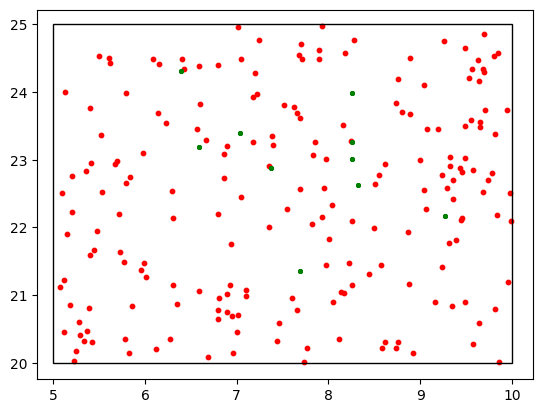

In [26]:
figure, axes = plt.subplots()
#axes.set(xlim=(.0, 1.), ylim=(.0, 1.))
uc_3 = plt.Rectangle((5, 20), 5, 5, fill=False)

points_1 = plt.scatter(list(map(lambda x: x[0], training_samples)), list(map(lambda x: x[1], training_samples)),
                       color="red", s=10)
points_2 = plt.scatter(second_x, second_y,
                       color="green", s=5)
axes.add_artist(uc_3)
plt.show()